# Classification Project

<a href="https://colab.research.google.com/github/ErfanRasti/DataMining-Projects/blob/main/ClassificationProject/main.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

<a target="_blank\" href="https://kaggle.com/kernels/welcome?src=https://github.com/ErfanRasti/DataMining-Projects/blob/main/ClassificationProject/main.ipynb">
 <img src="https://kaggle.com/static/images/open-in-kaggle.svg" />
</a>


## Importring libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from dython.nominal import associations
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, accuracy_score, get_scorer_names


## Importing the dataset


In [2]:
train_ds = pd.read_csv('./data/Adult_TrainDataset.csv')
test_ds = pd.read_csv('./data/Adult_TestDataset.csv')


In [3]:
train_ds.head()


Age        Work_Class  Final_Weight  Education  Education-Number  \
0   39         State-gov         77516  Bachelors                13   
1   50  Self-emp-not-inc         83311  Bachelors                13   
2   38           Private        215646    HS-grad                 9   
3   53           Private        234721       11th                 7   
4   28           Private        338409  Bachelors                13   

       Marital_Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [4]:
test_ds.head()


Age Work_Class  Final_Weight     Education  Education-Number  \
0   25    Private        226802          11th                 7   
1   38    Private         89814       HS-grad                 9   
2   28  Local-gov        336951    Assoc-acdm                12   
3   44    Private        160323  Some-college                10   
4   18          ?        103497  Some-college                10   

       Marital_Status         Occupation Relationship   Race     Sex  \
0       Never-married  Machine-op-inspct    Own-child  Black    Male   
1  Married-civ-spouse    Farming-fishing      Husband  White    Male   
2  Married-civ-spouse    Protective-serv      Husband  White    Male   
3  Married-civ-spouse  Machine-op-inspct      Husband  Black    Male   
4       Never-married                  ?    Own-child  White  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0             0             0              40  United-States  <=50K  
1             0             0              50  United-States  <=50K  
2             0             0              40  United-States   >50K  
3          7688             0              40  United-States   >50K  
4             0             0              30  United-States  <=50K

## Data preprocessing


### Cleaning the dataset


In [5]:
train_ds.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Work_Class        32561 non-null  object
 2   Final_Weight      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-Number  32561 non-null  int64 
 5   Marital_Status    32561 non-null  object
 6   Occupation        32561 non-null  object
 7   Relationship      32561 non-null  object
 8   Race              32561 non-null  object
 9   Sex               32561 non-null  object
 10  Capital_Gain      32561 non-null  int64 
 11  Capital_Loss      32561 non-null  int64 
 12  Hours-Per-Week    32561 non-null  int64 
 13  Native_Country    32561 non-null  object
 14  Income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
train_ds.isnull().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [7]:
test_ds.isnull().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [8]:
train_ds.shape


(32561, 15)

In [9]:
for col in train_ds.columns:
    train_ds.drop(train_ds[train_ds[col] == '?'].index, inplace=True)


In [10]:
train_ds.shape


(30162, 15)

In [11]:
test_ds.shape


(16281, 15)

In [12]:
for col in test_ds.columns:
    test_ds.drop(test_ds[test_ds[col] == '?'].index, inplace=True)


In [13]:
test_ds.shape


(15060, 15)

In [14]:
train_ds.isna().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

In [15]:
test_ds.isna().sum()


Age                 0
Work_Class          0
Final_Weight        0
Education           0
Education-Number    0
Marital_Status      0
Occupation          0
Relationship        0
Race                0
Sex                 0
Capital_Gain        0
Capital_Loss        0
Hours-Per-Week      0
Native_Country      0
Income              0
dtype: int64

### Visualizing The Dataset


In [17]:
train_ds['Income'].value_counts()


<=50K    22654
>50K      7508
Name: Income, dtype: int64

In [18]:
train_ds.describe()


Age  Final_Weight  Education-Number  Capital_Gain  \
count  30162.000000  3.016200e+04      30162.000000  30162.000000   
mean      38.437902  1.897938e+05         10.121312   1092.007858   
std       13.134665  1.056530e+05          2.549995   7406.346497   
min       17.000000  1.376900e+04          1.000000      0.000000   
25%       28.000000  1.176272e+05          9.000000      0.000000   
50%       37.000000  1.784250e+05         10.000000      0.000000   
75%       47.000000  2.376285e+05         13.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital_Loss  Hours-Per-Week  
count  30162.000000    30162.000000  
mean      88.372489       40.931238  
std      404.298370       11.979984  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

#### Plotting the histogram of the numerical features for training dataset


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Final_Weight'}>],
       [<Axes: title={'center': 'Education-Number'}>,
        <Axes: title={'center': 'Capital_Gain'}>],
       [<Axes: title={'center': 'Capital_Loss'}>,
        <Axes: title={'center': 'Hours-Per-Week'}>]], dtype=object)

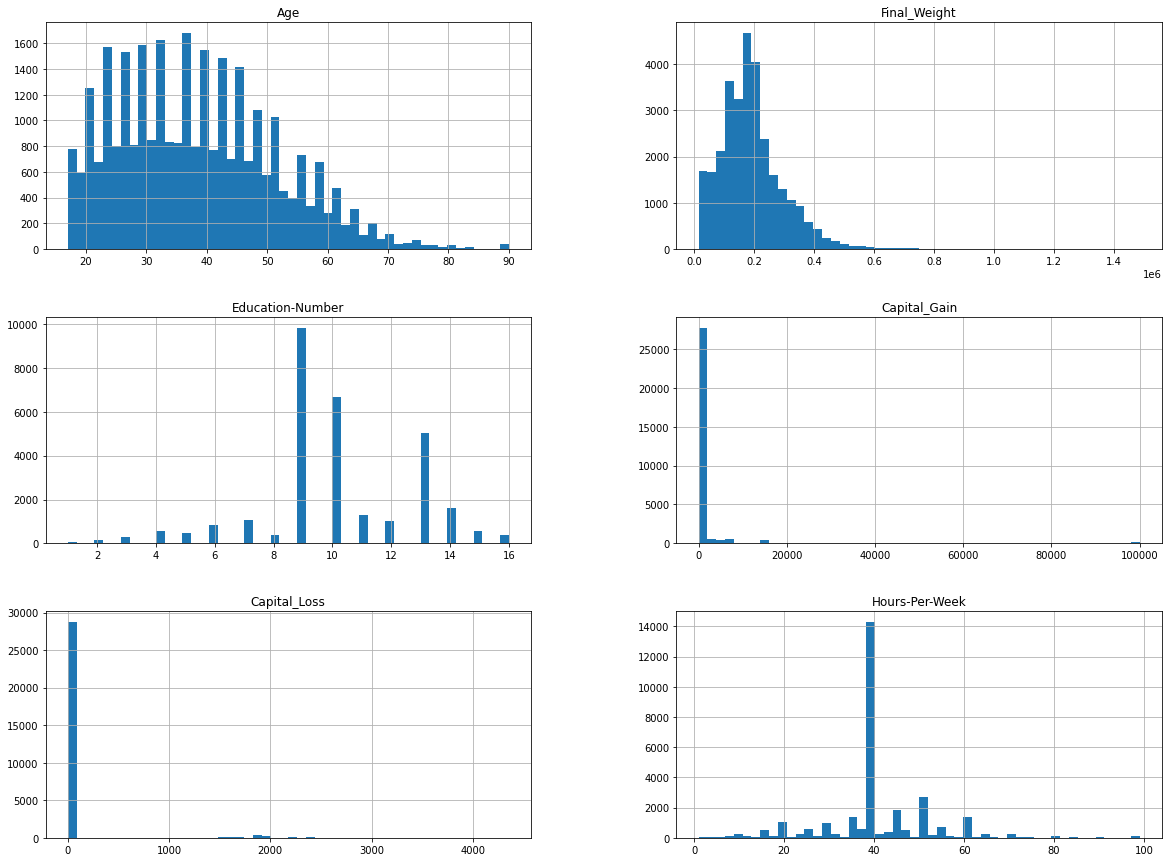

In [18]:
train_ds.hist(bins=50, figsize=(20, 15))


#### Plotting the histogram of the categorical features for training dataset


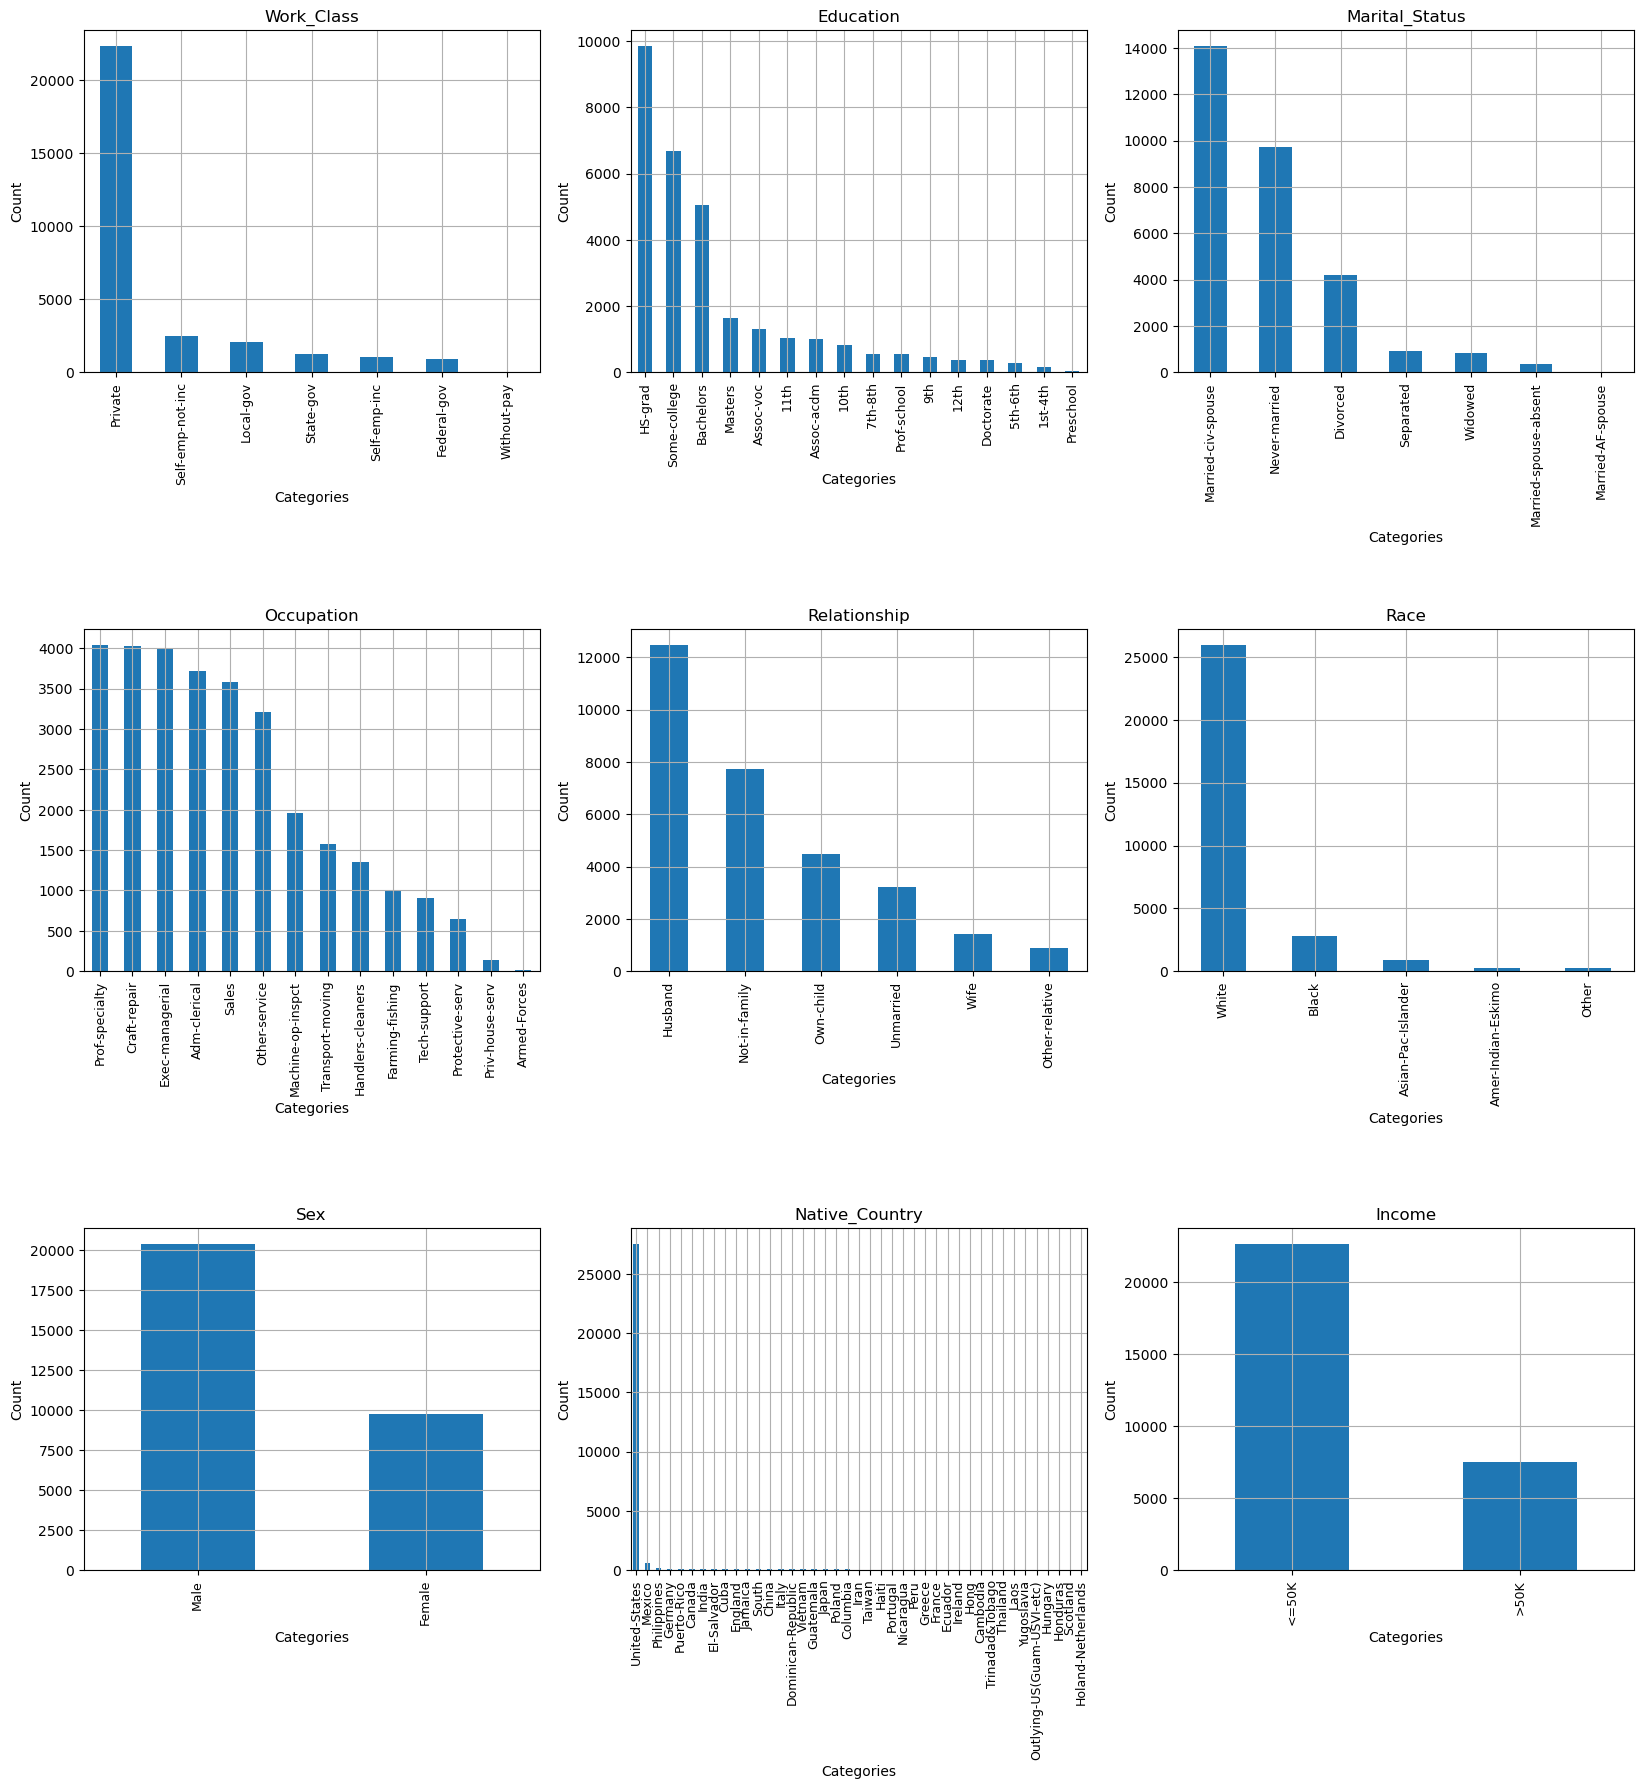

In [87]:
categorical_features = train_ds.select_dtypes(include=['object']).columns

fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=0.75)
for i, col in enumerate(categorical_features):
    plt.subplot(3, 3, i+1)

    train_ds[col].value_counts().plot(kind='bar')
    plt.grid(True)
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.xticks(fontsize=9)


#### Plotting the pie chart of the categorical features for training dataset


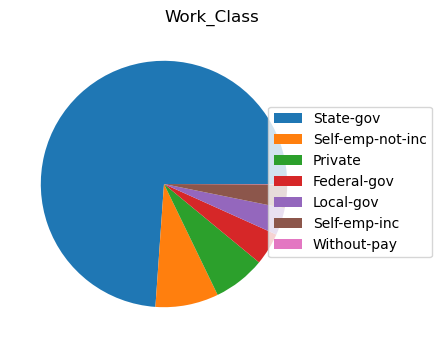

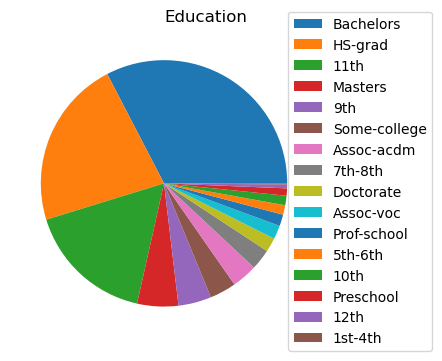

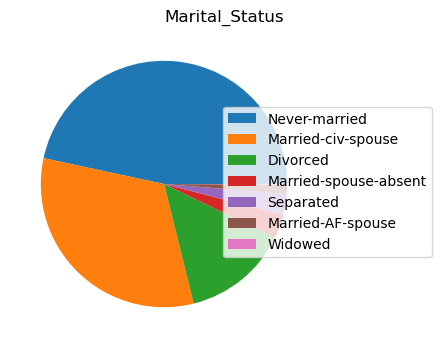

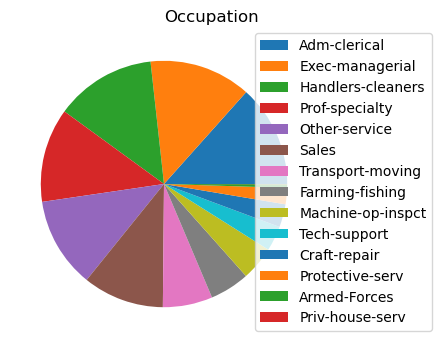

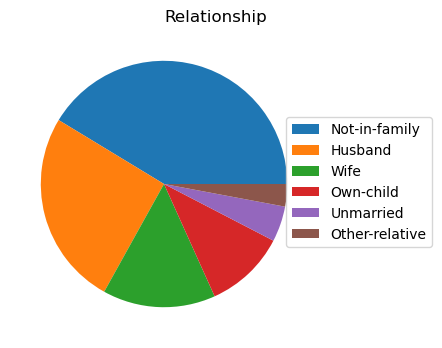

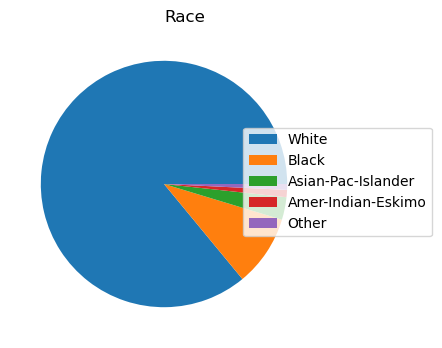

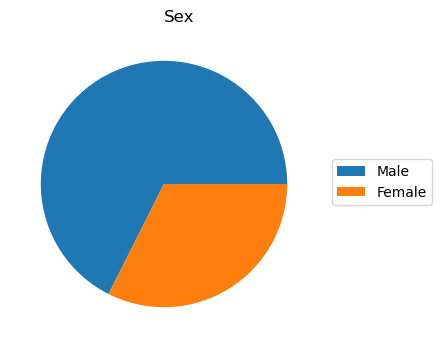

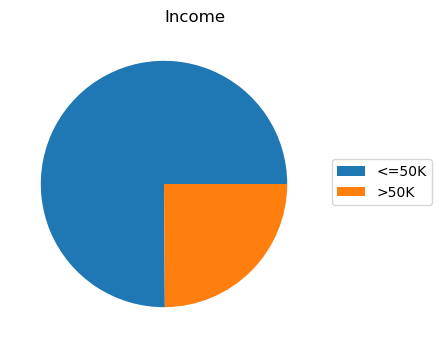

In [88]:
for i, col in enumerate(list(filter(lambda x: x != 'Native_Country', categorical_features))):
    plt.figure(figsize=(4, 4))
    plt.pie(train_ds[col].value_counts())
    title = plt.title(col)
    title.set_ha("left")
    plt.legend(train_ds[col].unique(), bbox_to_anchor=(1.2, 0.5), loc="center right", fontsize=10,
               bbox_transform=plt.gcf().transFigure)


<b>Note:</b> We ignore the pie plot for the feature <i> "Native_Country" </i> because it has too many categories.


#### Plotting the scatter plots


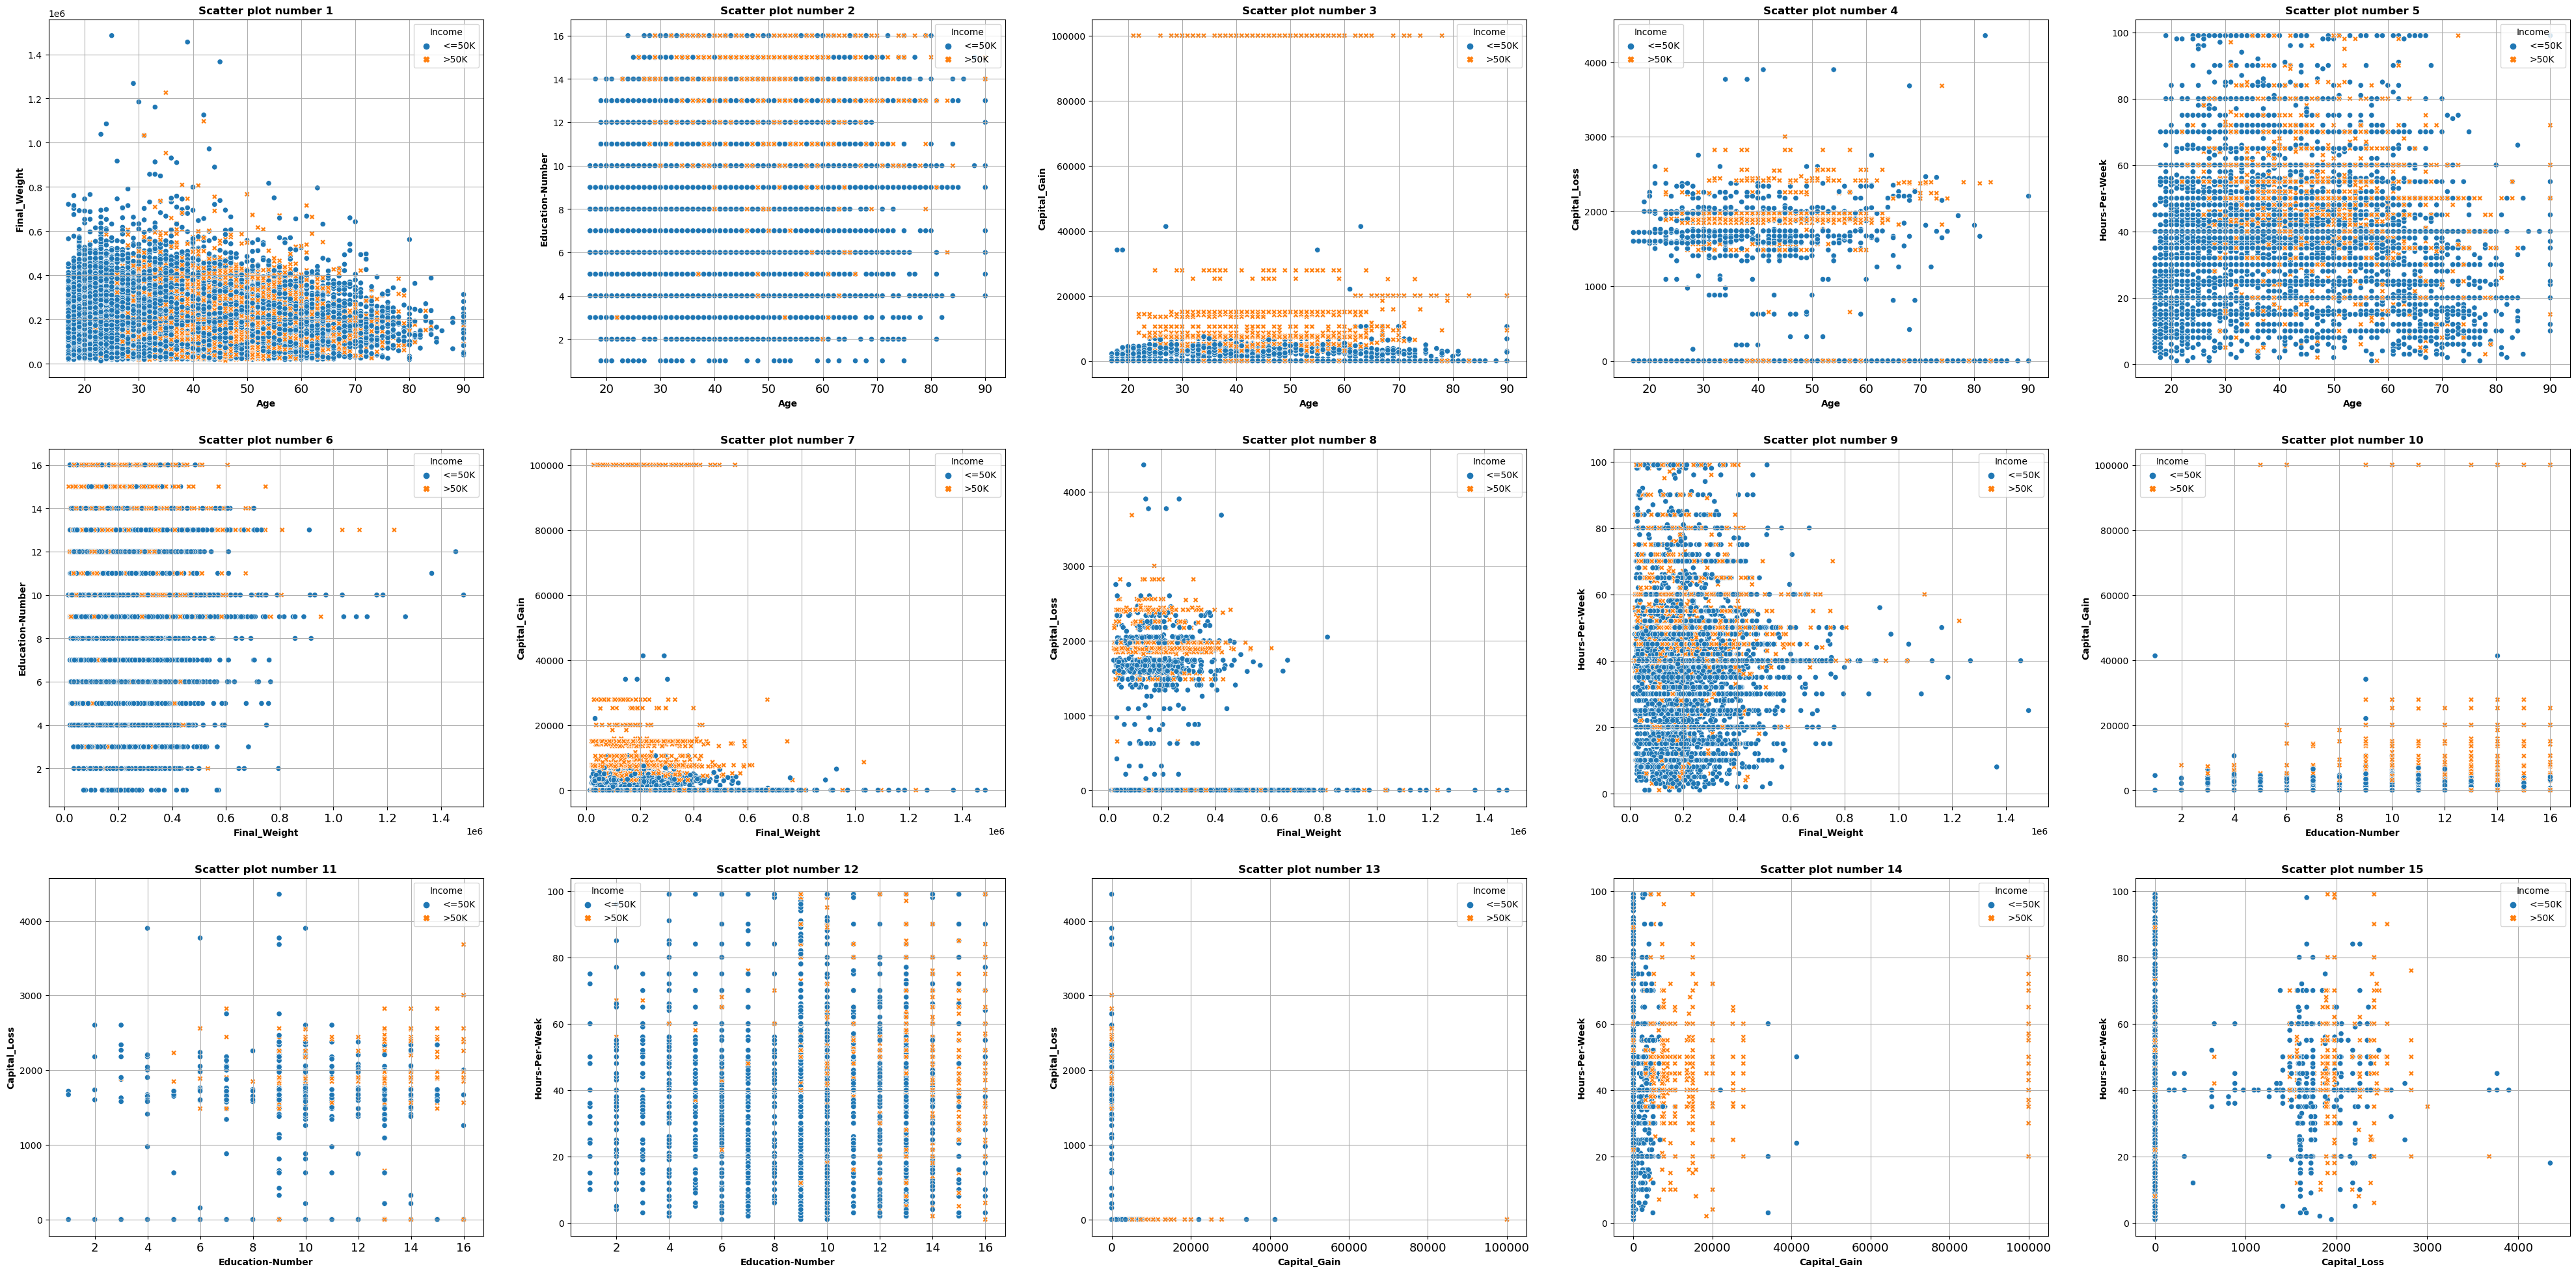

In [89]:
numerical_features = train_ds.select_dtypes(include='int64').columns

train_ds_label = train_ds['Income']
plt_num = 1
fig = plt.figure(figsize=(50, 50))
for i, x_col in enumerate(numerical_features):
    for j, y_col in enumerate(numerical_features[i:]):
        if x_col != y_col:
            plt.subplot(6, 5, plt_num)
            sns.scatterplot(data=train_ds, x=x_col, y=y_col, hue="Income",
                            style="Income")
            plt.xlabel(xlabel=x_col, fontweight="bold")
            plt.ylabel(ylabel=y_col, fontweight="bold")
            plt.title(f"Scatter plot number {plt_num}", fontweight="bold")
            plt.xticks(fontsize=13)
            plt.grid(True)
            plt_num = plt_num + 1


<b>Note:</b>

- there is no correlation between features.
- As we can see in the '**' scatter plot number 3 '**' the label of samples that their '**'capital_gain'**' is above 10000 is orange.
- As we can see in the '**' scatter plot number 12 '**' most of the label of samples that their '**' Education_Number '**' is more that 9 is orange.
- As we can see in the '**' scatter plot number 13 '**' most of the label of samples that their '**' Capital_Gain '**' is more that 4000 is orange.


#### Ploting the box plot for the numerical data


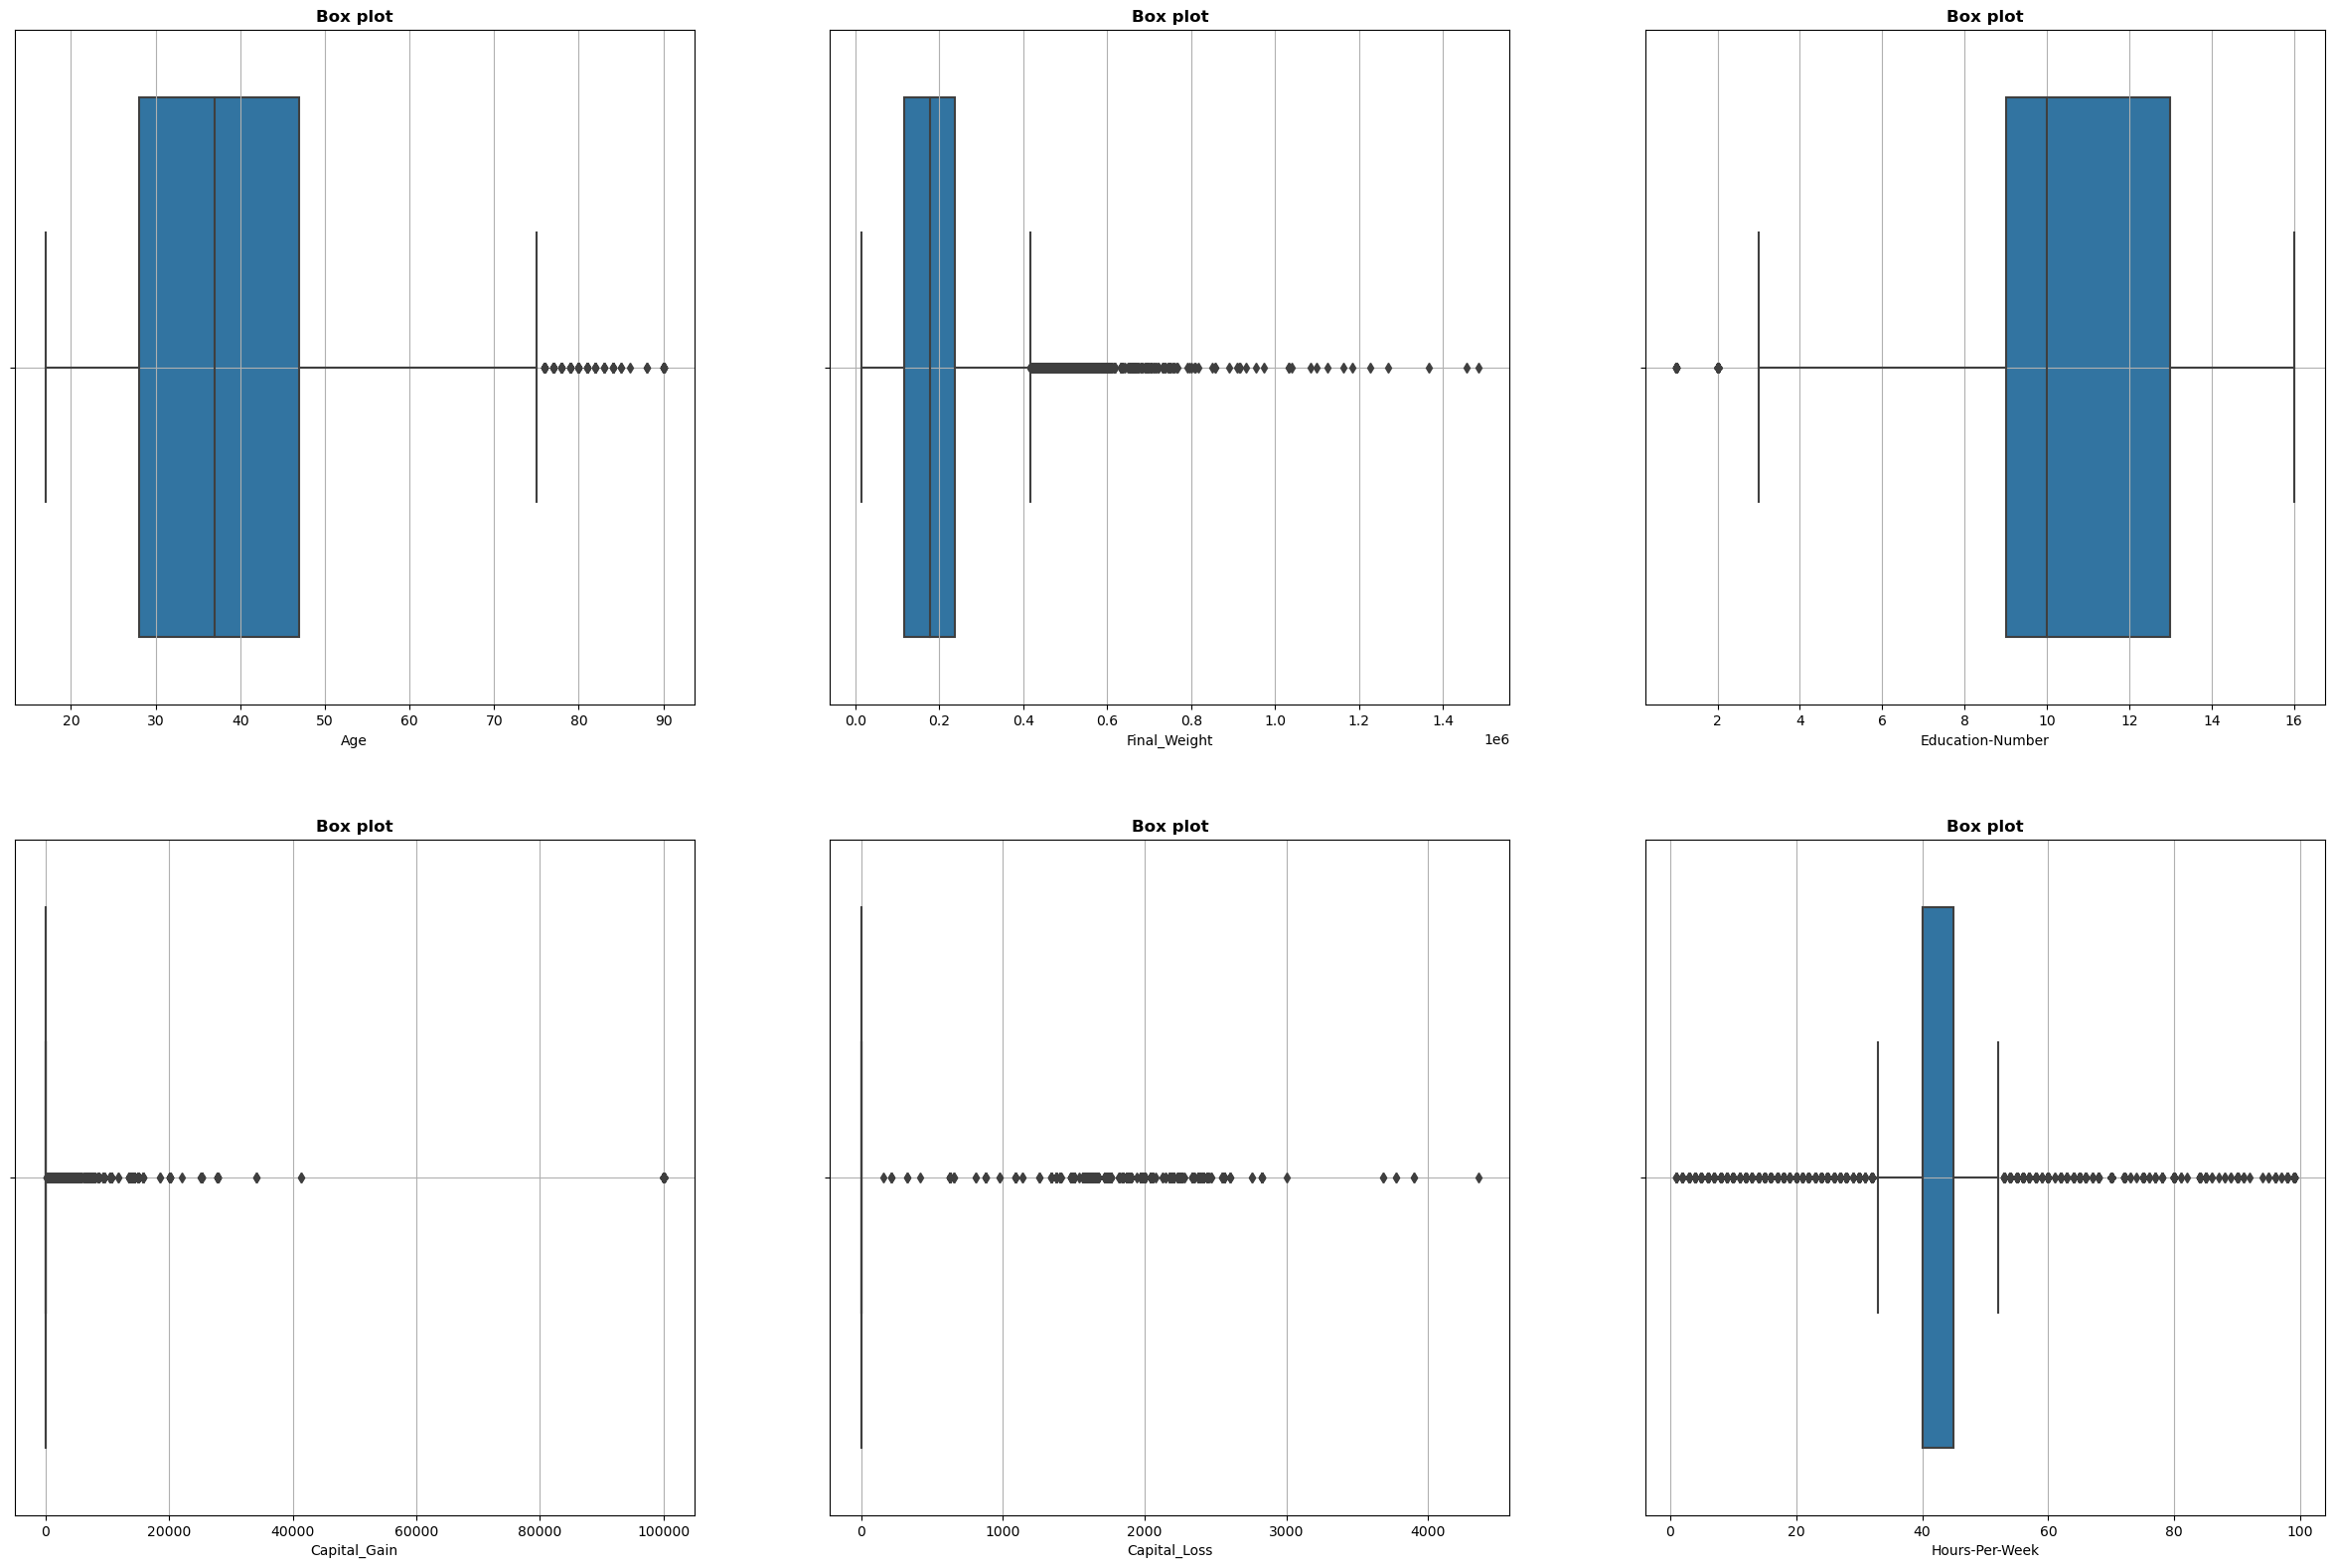

In [90]:
plt_num = 1
fig = plt.figure(2, figsize=(10, 10))
for x_col in numerical_features:
    plt.subplot(3, 3, plt_num)
    sns.boxplot(data=train_ds, x=x_col, hue="Income")
    plt.title("Box plot", fontweight="bold")
    plt.xticks(fontsize=10)
    plt.grid(True)
    plt_num = plt_num + 1


<b>Note:</b>

- We should decide how to deal with '**' Capital_Gain '**' and '**' Capital_Loss '**' because most of the samples are zero in these two features. (more than 75% of the samples are 0)


#### Pandas Profiling


In [18]:
ProfileReport(train_ds)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Correlation between features


#### Correlation between numerical data


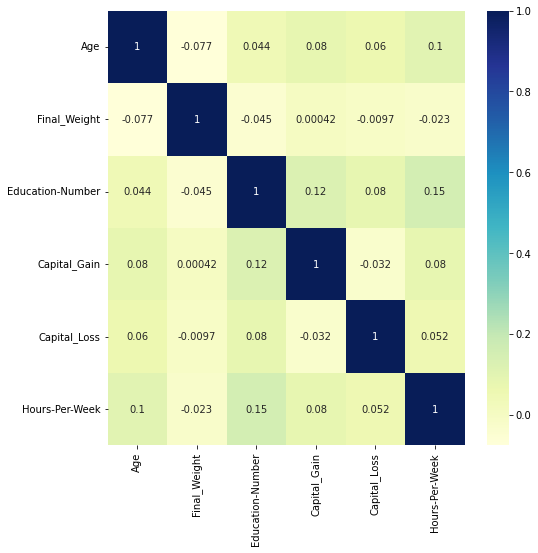

In [16]:
corr_mat_num = train_ds.corr()
plt.figure(figsize=(8, 8))
ax = sns.heatmap(corr_mat_num, annot=True, cmap="YlGnBu")


<b>Note:</b> There is a little correation between ('**' Education-Number '**', '**' Hours-Per-Week '**')


#### Correlation between categorical data


<b>Note</b>: You should to install dython package.


<Figure size 576x576 with 0 Axes>

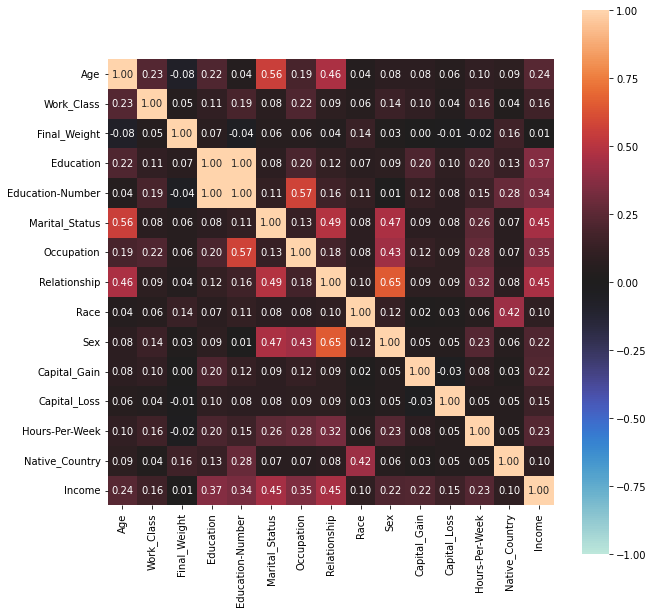

In [17]:
plt.figure(figsize=(8, 8))
corr_mat_complete = associations(
    train_ds,
    filename='./images/complete_correlation.png',
    figsize=(10, 10))


### Preprocessing The dataset based on the correlation between features


In [18]:
train_ds.head()


Age        Work_Class  Final_Weight  Education  Education-Number  \
0   39         State-gov         77516  Bachelors                13   
1   50  Self-emp-not-inc         83311  Bachelors                13   
2   38           Private        215646    HS-grad                 9   
3   53           Private        234721       11th                 7   
4   28           Private        338409  Bachelors                13   

       Marital_Status         Occupation   Relationship   Race     Sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   Capital_Gain  Capital_Loss  Hours-Per-Week Native_Country Income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [19]:
train_ds['Education'].value_counts()


HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: Education, dtype: int64

In [20]:
train_ds['Education-Number'].value_counts()


9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: Education-Number, dtype: int64

In [21]:
train_ds.drop('Education', axis=1, inplace=True)
test_ds.drop('Education', axis=1, inplace=True)


In [22]:
train_ds.describe()


Age  Final_Weight  Education-Number  Capital_Gain  \
count  30162.000000  3.016200e+04      30162.000000  30162.000000   
mean      38.437902  1.897938e+05         10.121312   1092.007858   
std       13.134665  1.056530e+05          2.549995   7406.346497   
min       17.000000  1.376900e+04          1.000000      0.000000   
25%       28.000000  1.176272e+05          9.000000      0.000000   
50%       37.000000  1.784250e+05         10.000000      0.000000   
75%       47.000000  2.376285e+05         13.000000      0.000000   
max       90.000000  1.484705e+06         16.000000  99999.000000   

       Capital_Loss  Hours-Per-Week  
count  30162.000000    30162.000000  
mean      88.372489       40.931238  
std      404.298370       11.979984  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

### Preprocessing the data based on the measures of central tendency and dispersion


#### Analyzing the Capital_Gain and Capital_Loss features


In [23]:
train_ds.Capital_Gain.value_counts()


0        27624
15024      337
7688       270
7298       240
99999      148
         ...  
1639         1
6097         1
2538         1
1455         1
1086         1
Name: Capital_Gain, Length: 118, dtype: int64

In [24]:
train_ds.Capital_Loss.value_counts()


0       28735
1902      194
1977      162
1887      155
1848       50
        ...  
2080        1
4356        1
1539        1
1844        1
1411        1
Name: Capital_Loss, Length: 90, dtype: int64

<b>Note:</b> The most of the samples in these two features are zero, but the correlation between them and target is high so we don't drop these feartures.


#### Analyzing the House-Per-Week feature


In [25]:
train_ds['Hours-Per-Week'].value_counts()


40    14251
50     2718
45     1753
60     1405
35     1184
      ...  
82        1
94        1
92        1
87        1
74        1
Name: Hours-Per-Week, Length: 94, dtype: int64

This feature has lots of value that are 40. These values are close to the mean of this feature. So we don't need to do anything with this feature.


### Preprocessing the categorical features


In [26]:
categorical_features = train_ds.select_dtypes(include=['object']).columns


In [27]:
for col in categorical_features:
    print('+++++++++++++++++++++++++++++++++++++')
    print(col + ' classes:')
    print(train_ds[col].value_counts())


+++++++++++++++++++++++++++++++++++++
Work_Class classes:
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Name: Work_Class, dtype: int64
+++++++++++++++++++++++++++++++++++++
Marital_Status classes:
Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: Marital_Status, dtype: int64
+++++++++++++++++++++++++++++++++++++
Occupation classes:
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces       

These features are okay to work with. The only important is the <i>"Native_Country"</i> feature which lots of its values are United-States. We decided to don't delete this feature because it may be important for the model and that samples which their <i>"Native_Country"</i> is not United-States may have a different label.


### Reseting the index of the dataset


We should reset the index of the dataset because we deleted some rows.


In [28]:
train_ds.reset_index(drop=True, inplace=True)
test_ds.reset_index(drop=True, inplace=True)


### Separating the labels from the data


In [29]:
train_targets = train_ds['Income']
train_ds.drop(['Income'], axis=1, inplace=True)

test_targets = test_ds['Income']
test_ds.drop(['Income'], axis=1, inplace=True)


### Encoding the categorical features and labels


#### Label encoding for the training set


In [30]:
categorical_features = train_ds.select_dtypes(include=['object']).columns
label_encoder_list = {feature: LabelEncoder()
                      for feature in categorical_features}

train_ds_labelEncoded = train_ds.copy()
for feature in categorical_features:
    train_ds_labelEncoded[feature] = label_encoder_list[feature].fit_transform(
        train_ds_labelEncoded[feature])

train_ds_labelEncoded


Age  Work_Class  Final_Weight  Education-Number  Marital_Status  \
0       39           5         77516                13               4   
1       50           4         83311                13               2   
2       38           2        215646                 9               0   
3       53           2        234721                 7               2   
4       28           2        338409                13               2   
...    ...         ...           ...               ...             ...   
30157   27           2        257302                12               2   
30158   40           2        154374                 9               2   
30159   58           2        151910                 9               6   
30160   22           2        201490                 9               4   
30161   52           3        287927                 9               2   

       Occupation  Relationship  Race  Sex  Capital_Gain  Capital_Loss  \
0               0             1     4    1          2174             0   
1               3             0     4    1             0             0   
2               5             1     4    1             0             0   
3               5             0     2    1             0             0   
4               9             5     2    0             0             0   
...           ...           ...   ...  ...           ...           ...   
30157          12             5     4    0             0             0   
30158           6             0     4    1             0             0   
30159           0             4     4    0             0             0   
30160           0             3     4    1             0             0   
30161           3             5     4    0         15024             0   

       Hours-Per-Week  Native_Country  
0                  40              38  
1                  13              38  
2                  40              38  
3                  40              38  
4                  40               4  
...               ...             ...  
30157              38              38  
30158              40              38  
30159              40              38  
30160              20              38  
30161              40              38  

[30162 rows x 13 columns]

In [31]:
target_encoder = LabelEncoder()
train_targets_encoded = target_encoder.fit_transform(train_targets)

train_targets_encoded


array([0, 0, 0, ..., 0, 0, 1])

#### Label Encoding for the test set


In [32]:
test_ds_labelEncoded = test_ds.copy()
for feature in categorical_features:
    test_ds_labelEncoded[feature] = label_encoder_list[feature].transform(
        test_ds_labelEncoded[feature])

test_ds_labelEncoded


Age  Work_Class  Final_Weight  Education-Number  Marital_Status  \
0       25           2        226802                 7               4   
1       38           2         89814                 9               2   
2       28           1        336951                12               2   
3       44           2        160323                10               2   
4       34           2        198693                 6               4   
...    ...         ...           ...               ...             ...   
15055   33           2        245211                13               4   
15056   39           2        215419                13               0   
15057   38           2        374983                13               2   
15058   44           2         83891                13               0   
15059   35           3        182148                13               2   

       Occupation  Relationship  Race  Sex  Capital_Gain  Capital_Loss  \
0               6             3     2    1             0             0   
1               4             0     4    1             0             0   
2              10             0     4    1             0             0   
3               6             0     2    1          7688             0   
4               7             1     4    1             0             0   
...           ...           ...   ...  ...           ...           ...   
15055           9             3     4    1             0             0   
15056           9             1     4    0             0             0   
15057           9             0     4    1             0             0   
15058           0             3     1    1          5455             0   
15059           3             0     4    1             0             0   

       Hours-Per-Week  Native_Country  
0                  40              38  
1                  50              38  
2                  40              38  
3                  40              38  
4                  30              38  
...               ...             ...  
15055              40              38  
15056              36              38  
15057              50              38  
15058              40              38  
15059              60              38  

[15060 rows x 13 columns]

In [33]:
test_targets_encoded = target_encoder.transform(test_targets)

test_targets_encoded


array([0, 0, 1, ..., 0, 0, 1])

#### One-hot encoding the training set


In [34]:
onehot_encoders_list = {feature: OneHotEncoder()
                        for feature in categorical_features}

train_ds_onehotEncoded = train_ds.copy()
for feature in categorical_features:
    enocded_column = onehot_encoders_list[feature].fit_transform(
        train_ds_onehotEncoded[[feature]])

    print('*************************************')
    print('Processing the faeture '+feature)
    print(onehot_encoders_list[feature].categories_[0])
    train_ds_onehotEncoded.drop(columns=[feature], inplace=True)
    train_ds_onehotEncoded = pd.concat([train_ds_onehotEncoded, pd.DataFrame(
        enocded_column.toarray(),
        columns=feature+'_'+onehot_encoders_list[feature].categories_[0])],
        axis=1)

train_ds_onehotEncoded


*************************************
Processing the faeture Work_Class
['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay']
*************************************
Processing the faeture Marital_Status
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed']
*************************************
Processing the faeture Occupation
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving']
*************************************
Processing the faeture Relationship
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife']
*************************************
Processing the faeture Race
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White']
*************************************
Proce

Age  Final_Weight  Education-Number  Capital_Gain  Capital_Loss  \
0       39         77516                13          2174             0   
1       50         83311                13             0             0   
2       38        215646                 9             0             0   
3       53        234721                 7             0             0   
4       28        338409                13             0             0   
...    ...           ...               ...           ...           ...   
30157   27        257302                12             0             0   
30158   40        154374                 9             0             0   
30159   58        151910                 9             0             0   
30160   22        201490                 9             0             0   
30161   52        287927                 9         15024             0   

       Hours-Per-Week  Work_Class_Federal-gov  Work_Class_Local-gov  \
0                  40                     0.0                   0.0   
1                  13                     0.0                   0.0   
2                  40                     0.0                   0.0   
3                  40                     0.0                   0.0   
4                  40                     0.0                   0.0   
...               ...                     ...                   ...   
30157              38                     0.0                   0.0   
30158              40                     0.0                   0.0   
30159              40                     0.0                   0.0   
30160              20                     0.0                   0.0   
30161              40                     0.0                   0.0   

       Work_Class_Private  Work_Class_Self-emp-inc  ...  \
0                     0.0                      0.0  ...   
1                     0.0                      0.0  ...   
2                     1.0                      0.0  ...   
3                     1.0                      0.0  ...   
4                     1.0                      0.0  ...   
...                   ...                      ...  ...   
30157                 1.0                      0.0  ...   
30158                 1.0                      0.0  ...   
30159                 1.0                      0.0  ...   
30160                 1.0                      0.0  ...   
30161                 0.0                      1.0  ...   

       Native_Country_Portugal  Native_Country_Puerto-Rico  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
30157                      0.0                         0.0   
30158                      0.0                         0.0   
30159                      0.0                         0.0   
30160                      0.0                         0.0   
30161                      0.0                         0.0   

       Native_Country_Scotland  Native_Country_South  Native_Country_Taiwan  \
0                          0.0                   0.0                    0.0   
1                          0.0                   0.0                    0.0   
2                          0.0                   0.0                    0.0   
3                          0.0                   0.0                    0.0   
4                          0.0                   0.0                    0.0   
...                        ...                   ...                    ...   
30157                      0.0                   0.0                    0.0   
30158                      0.0                   0.0                    0.0   
30159                      0.0                   0.0                    0.0   
30160                

#### One-hot encoding the test set


In [35]:
test_ds_onehotEncoded = test_ds.copy()
for feature in categorical_features:
    test_ds_onehotEncoded = pd.concat([test_ds_onehotEncoded, pd.DataFrame(
        onehot_encoders_list[feature].transform(
            test_ds_onehotEncoded[[feature]]).toarray(),
        columns=feature+'_'+onehot_encoders_list[feature].categories_[0])],
        axis=1)
    test_ds_onehotEncoded.drop(columns=[feature], inplace=True)

test_ds_onehotEncoded


Age  Final_Weight  Education-Number  Capital_Gain  Capital_Loss  \
0       25        226802                 7             0             0   
1       38         89814                 9             0             0   
2       28        336951                12             0             0   
3       44        160323                10          7688             0   
4       34        198693                 6             0             0   
...    ...           ...               ...           ...           ...   
15055   33        245211                13             0             0   
15056   39        215419                13             0             0   
15057   38        374983                13             0             0   
15058   44         83891                13          5455             0   
15059   35        182148                13             0             0   

       Hours-Per-Week  Work_Class_Federal-gov  Work_Class_Local-gov  \
0                  40                     0.0                   0.0   
1                  50                     0.0                   0.0   
2                  40                     0.0                   1.0   
3                  40                     0.0                   0.0   
4                  30                     0.0                   0.0   
...               ...                     ...                   ...   
15055              40                     0.0                   0.0   
15056              36                     0.0                   0.0   
15057              50                     0.0                   0.0   
15058              40                     0.0                   0.0   
15059              60                     0.0                   0.0   

       Work_Class_Private  Work_Class_Self-emp-inc  ...  \
0                     1.0                      0.0  ...   
1                     1.0                      0.0  ...   
2                     0.0                      0.0  ...   
3                     1.0                      0.0  ...   
4                     1.0                      0.0  ...   
...                   ...                      ...  ...   
15055                 1.0                      0.0  ...   
15056                 1.0                      0.0  ...   
15057                 1.0                      0.0  ...   
15058                 1.0                      0.0  ...   
15059                 0.0                      1.0  ...   

       Native_Country_Portugal  Native_Country_Puerto-Rico  \
0                          0.0                         0.0   
1                          0.0                         0.0   
2                          0.0                         0.0   
3                          0.0                         0.0   
4                          0.0                         0.0   
...                        ...                         ...   
15055                      0.0                         0.0   
15056                      0.0                         0.0   
15057                      0.0                         0.0   
15058                      0.0                         0.0   
15059                      0.0                         0.0   

       Native_Country_Scotland  Native_Country_South  Native_Country_Taiwan  \
0                          0.0                   0.0                    0.0   
1                          0.0                   0.0                    0.0   
2                          0.0                   0.0                    0.0   
3                          0.0                   0.0                    0.0   
4                          0.0                   0.0                    0.0   
...                        ...                   ...                    ...   
15055                      0.0                   0.0                    0.0   
15056                      0.0                   0.0                    0.0   
15057                      0.0                   0.0                    0.0   
15058                

### Standardizing the data


In [36]:
train_ds_labelEncoded = train_ds_labelEncoded.astype('float32')
train_ds_onehotEncoded = train_ds_onehotEncoded.astype('float32')

test_ds_labelEncoded = test_ds_labelEncoded.astype('float32')
test_ds_onehotEncoded = test_ds_onehotEncoded.astype('float32')

train_targets_encoded = train_targets_encoded.astype('float32')
test_targets_encoded = test_targets_encoded.astype('float32')


In [37]:
# print(train_ds_labelEncoded.isna().sum().sum())
# print(train_ds_onehotEncoded.isna().sum().sum())
# print(test_ds_labelEncoded.isna().sum().sum())
# print(test_ds_onehotEncoded.isna().sum().sum())
# # print(train_targets_encoded.isna().sum().sum())
# # print(test_targets_encoded.isna().sum().sum())


In [38]:
train_ds_labelEncoded_scaled = np.array(train_ds_labelEncoded)
train_ds_labelEncoded_mean = train_ds_labelEncoded_scaled.mean(axis=0)
train_ds_labelEncoded_scaled -= train_ds_labelEncoded_mean
train_ds_labelEncoded_std = train_ds_labelEncoded_scaled.std(axis=0)
train_ds_labelEncoded_scaled /= train_ds_labelEncoded_std

test_ds_labelEncoded_scaled = np.array(test_ds_labelEncoded)
test_ds_labelEncoded_scaled -= train_ds_labelEncoded_mean
test_ds_labelEncoded_scaled /= train_ds_labelEncoded_std


In [39]:
train_ds_onehotEncoded_scaled = np.array(train_ds_onehotEncoded)
train_ds_onehotEncoded_mean = train_ds_onehotEncoded_scaled.mean(axis=0)
train_ds_onehotEncoded_scaled -= train_ds_onehotEncoded_mean
train_ds_onehotEncoded_std = train_ds_onehotEncoded_scaled.std(axis=0)
train_ds_onehotEncoded_scaled /= train_ds_onehotEncoded_std

test_ds_onehotEncoded_scaled = np.array(test_ds_onehotEncoded)
test_ds_onehotEncoded_scaled -= train_ds_onehotEncoded_mean
test_ds_onehotEncoded_scaled /= train_ds_onehotEncoded_std


## Training the models


### Training the KNN model


In [41]:
knn_classifier_labelEncoded = KNeighborsClassifier(n_neighbors=15)
knn_classifier_labelEncoded.fit(train_ds_labelEncoded_scaled,
                                train_targets_encoded)


KNeighborsClassifier(n_neighbors=15)

In [46]:
knn_classifier_labelEncoded.score(test_ds_labelEncoded_scaled,
                                  test_targets_encoded)


/home/aram/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8343293492695883

In [49]:
knn_classifier_onehotEncoded = KNeighborsClassifier(n_neighbors=15)
knn_classifier_onehotEncoded.fit(train_ds_onehotEncoded_scaled,
                                 train_targets_encoded)


KNeighborsClassifier(n_neighbors=15)

In [50]:
knn_classifier_onehotEncoded.score(test_ds_onehotEncoded_scaled,
                                   test_targets_encoded)


/home/aram/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8309428950863214

#### Grid search on the KNN model for labelEncoded

</b>Hyper parameters in the Grid search</b>
- n_neighbors
- 'weights': ['uniform', 'distance']
- 'algorithm': ["auto", "ball_tree", "kd_tree", "brute"]
- 'p': [1, 2, float('inf')]

In [55]:
grid_param = {
    'n_neighbors': np.linspace(1,1000,100).astype('int64'),
    'weights': ['uniform', 'distance'],
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'metric': ['euclidean', 'cityblock', 'manhattan', 'l1', 'l2'],
    'p': [1, 2, float('inf')]
}

knn_classifier_labelEncoded = KNeighborsClassifier(n_jobs=-1)
knn_classifier_labelEncoded_grid_search = RandomizedSearchCV(estimator=knn_classifier_labelEncoded,
                                                             param_distributions=grid_param,
                                                             n_iter=30,
                                                             cv=5,
                                                             scoring=['f1', 'accuracy', 'precision', 'recall'],
                                                             refit='accuracy',
                                                             random_state=42,
                                                             verbose=7,
                                                             error_score='raise'
)

In [ ]:
import logging
import sys
from sklearn.model_selection import RandomizedSearchCV

# Set up logging to a file
logging.basicConfig(filename='search_logs.log', level=logging.INFO)

# Redirect logging output to sys.stdout
root_logger = logging.getLogger()
stdout_handler = logging.StreamHandler(sys.stdout)
root_logger.addHandler(stdout_handler)
knn_classifier_labelEncoded_grid_search.fit(train_ds_labelEncoded_scaled, train_targets_encoded)

joblib.dump(knn_classifier_labelEncoded_grid_search, './result/knn_classifier_grid_search_1.pkl')

##### check the results

In [68]:
knn_classifier_labelEncoded = KNeighborsClassifier(algorithm='kd_tree', metric='cityblock',
                                                   n_neighbors=51, p=10, weights='uniform')
knn_classifier_labelEncoded.fit(train_ds_labelEncoded_scaled,
                                train_targets_encoded)

KNeighborsClassifier(algorithm='kd_tree', metric='cityblock', n_neighbors=51,
                     p=10)

In [71]:
knn_classifier_labelEncoded.score(test_ds_labelEncoded_scaled,
                                  test_targets_encoded)

/home/aram/anaconda3/envs/sklearn-env/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8393758300132802

#### Grid search on the KNN model for OneHotEncoded

### Training the SVM model

In [73]:
svm_classifier_labelEncoded = SVC()
svm_classifier_labelEncoded.fit(train_ds_labelEncoded_scaled, train_targets_encoded)

SVC()

In [74]:
svm_classifier_labelEncoded.score(test_ds_labelEncoded_scaled, test_targets_encoded)

0.8454183266932271

In [42]:
svm_classifier_onehotEncoded = SVC()
svm_classifier_onehotEncoded.fit(train_ds_labelEncoded_scaled, train_targets_encoded)

SVC()

In [43]:
svm_classifier_onehotEncoded.score(test_ds_labelEncoded_scaled, test_targets_encoded)

0.8454183266932271

#### Grid search on the SVM model for LabelEncoded

In [42]:
grid_param={
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': list(range(1,15),),
    'gamma': ['scale', 'auto'],
    'coef0': np.linspace(-10, 10, 20)
}

svm_classifier_labelEncoded = SVC(random_state=50)
svm_classifier_labelEncoded_grid_search = RandomizedSearchCV(estimator=svm_classifier_labelEncoded,
                                                             param_distributions=grid_param,
                                                             n_iter=10,
                                                             cv=5,
                                                             scoring=['f1', 'accuracy'],
                                                             refit='accuracy',
                                                             random_state=50,
                                                             verbose=7,
                                                             n_jobs=-1
                                                            )



In [ ]:
svm_classifier_labelEncoded_grid_search.fit(test_ds_labelEncoded_scaled, test_targets_encoded)

</b>Notes</b>:
- after the first testing founded that the '**' sigmoid '**' and '**' Poly '**' kernel is not good
- the '**' rbf '**' kernel is the best kernel so in the second grid search we just use svm kernel

#### Second grid search for the SVM

In [103]:
grid_param={
    'C': list(range(5,15)),
    'kernel': ['rbf'],
    'degree': list(range(10,20)),
    'gamma': ['scale', 'auto'],
    'coef0': np.linspace(-5, 15, 20)
}

svm_classifier_labelEncoded = SVC(random_state=42)
svm_classifier_labelEncoded_grid_search = RandomizedSearchCV(estimator=svm_classifier_labelEncoded,
                                                             param_distributions=grid_param,
                                                             n_iter=20,
                                                             cv=5,
                                                             scoring=['f1', 'accuracy', 'precision'],
                                                             refit='accuracy',
                                                             random_state=42,
                                                             verbose=7,
                                                             n_jobs=-1
                                                            )



In [104]:
svm_classifier_labelEncoded_grid_search.fit(test_ds_labelEncoded_scaled, test_targets_encoded)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.838) f1: (test=0.627) precision: (test=0.723) total time=  31.2s
[CV 4/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.844) f1: (test=0.637) precision: (test=0.741) total time=  31.4s
[CV 3/5] END C=13, coef0=10.789473684210526, degree=13, gamma=auto, kernel=rbf; accuracy: (test=0.839) f1: (test=0.626) precision: (test=0.727) total time=  31.6s
[CV 2/5] END C=13, coef0=10.789473684210526, degree=13, gamma=auto, kernel=rbf; accuracy: (test=0.843) f1: (test=0.635) precision: (test=0.740) total time=  31.9s
[CV 5/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.846) f1: (test=0.651) precision: (test=0.736) total time=  32.9s
[CV 3/5] END C=12, coef0=13.94736842105263, degree=17, gamma=scale, kernel=rbf; accuracy: (test=0.839) f1: (test=0.627) pre

RandomizedSearchCV(cv=5, estimator=SVC(random_state=42), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                              14],
                                        'coef0': array([-5.        , -3.94736842, -2.89473684, -1.84210526, -0.78947368,
        0.26315789,  1.31578947,  2.36842105,  3.42105263,  4.47368421,
        5.52631579,  6.57894737,  7.63157895,  8.68421053,  9.73684211,
       10.78947368, 11.84210526, 12.89473684, 13.94736842, 15.        ]),
                                        'degree': [10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['rbf']},
                   random_state=42, refit='accuracy',
                   scoring=['f1', 'accuracy', 'precision'], verbose=7)

In [55]:
svm_classifier_labelEncoded_grid_search.best_estimator_

SVC(C=6, coef0=5.789473684210526, degree=8, gamma='auto', random_state=50)

In [105]:
results = svm_classifier_labelEncoded_grid_search.cv_results_

# Create a list of (score, parameters) tuples
score_parameters = [[score, parameters] for score, parameters in zip(results['mean_test_accuracy'], results['params'])]

# Sort the list in descending order of scores
score_parameters.sort(key=lambda x: x[0], reverse=True)


# Print the results in the desired order
for score, parameters in score_parameters:
    print(f"Score: {score:.4f}, Parameters: {parameters}")

Score: 0.8439, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 13, 'coef0': -1.8421052631578947, 'C': 6}
Score: 0.8436, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 15, 'coef0': 11.842105263157894, 'C': 5}
Score: 0.8436, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 15, 'coef0': 1.3157894736842106, 'C': 5}
Score: 0.8433, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 10, 'coef0': -1.8421052631578947, 'C': 7}
Score: 0.8433, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 15, 'coef0': 11.842105263157894, 'C': 7}
Score: 0.8430, Parameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 17, 'coef0': 9.736842105263158, 'C': 7}
Score: 0.8423, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 17, 'coef0': -0.7894736842105265, 'C': 8}
Score: 0.8423, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 19, 'coef0': -3.947368421052632, 'C': 8}
Score: 0.8423, Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 11, 'coef0': 9